# Density of States Analysis Example
* Given sample and empty-can data, compute phonon DOS
* To use this notebook, first click jupyter menu File->Make a copy
* Click the title of the copied jupyter notebook and change it to a new title
* Start executing cells

## Preparation

In [1]:
# where am I now?
!pwd

/SNS/users/lj7/dv/sns-chops/multiphonon/tests/notebooks


In [2]:
# create a new working directory and change into it
workdir = '~/reduction/ARCS/getdos-multiple-Ei-demo'
!mkdir -p {workdir}
%cd {workdir}

/home/lj7/reduction/ARCS/getdos-multiple-Ei-demo


In [3]:
# Data to reduce. Change the IPTS number and run numbers to suit your need
samplenxs = "/SNS/ARCS/IPTS-15398/shared/mantid_reduce/non-radC/non-radC_130p00.nxspe"
mtnxs = "/SNS/ARCS/IPTS-15398/shared/mantid_reduce/MT/MT_130p00.nxspe"
initdos = '/SNS/ARCS/IPTS-15398/shared/getdos/graphite-Ei_300-dos.h5'

## Run GetDOS

In [9]:
# import tools
import os, numpy as np
from multiphonon.getdos import notebookUI
import histogram.hdf as hh, histogram as H
%matplotlib notebook
from matplotlib import pyplot as plt

In [5]:
# create the UI for the first time
notebookUI(samplenxs, mtnxs, initdos=initdos, load_options_path='/SNS/ARCS/IPTS-15398/shared/getdos/130meV-getdos-opts.yaml')

## Check output

In [6]:
ls work/

dirdydos/         iqe.h5.bkup-wrongEaxis     mt-iqe.nxs              round-2/
final-dos.h5      iqe.nxs                    plot_dos_iteration.py*
getdos-opts.yaml  mt-iqe.h5                  round-0/
iqe.h5            mt-iqe.h5.bkup-wrongEaxis  round-1/


<IPython.core.display.Javascript object>


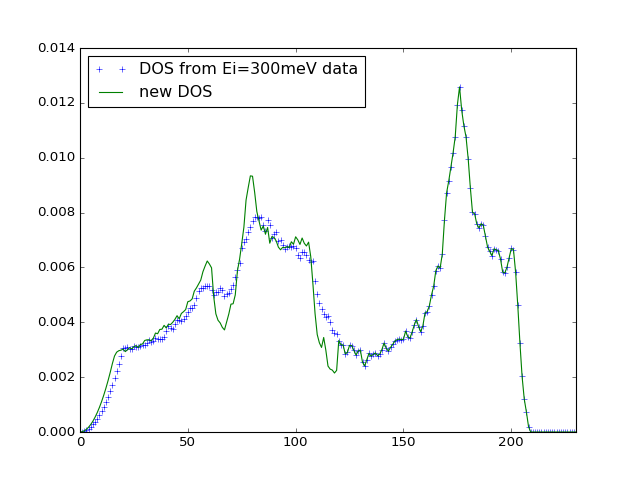

In [16]:
dos0= hh.load(initdos)
plt.plot(dos0.E, dos0.I, '+', label='DOS from Ei=300meV data')
dos = hh.load('work/final-dos.h5')
plt.plot(dos.E, dos.I, label='new DOS')
plt.xlim(0, 230)
plt.legend(loc='top left')

## Refine GetDOS

In [ ]:
# if you need to run getdos again with slightly modified options
# you can start from the previous settings
notebookUI(samplenxs, mtnxs, load_options_path="./work/getdos-opts.yaml")